1. EDA Analysis
2. Feature Engineering
    * Splitting dataset (train-set, test-set)
    * Split numerical columns and categorical columns
    * Outliers handling untuk X_train saja, X_test TIDAK PERLU HANDLING OUTLIER
      (Jika ada yang di drop di X_train, maka y_train di drop juga based on index)
    * Missing value handling untuk X_train, X_test, y_train(drop), y_test(drop)
      (Jika ada yang di drop di X_train/X_test, maka y_train/y_test di drop juga based on index)
    * Feature Selection cek dari X_train, lalu diterapkan ke X_test juga jika ada feature yang didrop
    * Split numerical columns and categorical columns [OPTIONAL]
    * Cardinality check for categorical columns
    * Feature Scaling untuk column numeric
    * Feature Encoding untuk column category (encode juga y_train jika berbentuk category)
3. Modeling (masukkan X_train & y_train)
4. Model Evaluation
    * Predict X_train dan y_train
    * Predict X_test dan y_test
    * Bandingkan akurasi antara train-set & test-set
    * Model Analysis : lakukan analisis terkait hasil, parameter, waktu pemrosesan, dll
5. (OPTIONAL) Model Tuning
    * Cari hyperparameter dengan memakai Grid Search/Random Search
    * Model Analysis : lakukan analisis terkait hasil, parameter, waktu pemrosesan, dll
6. Model Inference
    * Gunakan berdasarkan inference-set
    * Lakukan preprocessing
    * Predict inference-set
7. Overall Analysis : berikan narasi terkait EDA Analysis dan Model Analysis yang sudah dibuat.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data file
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


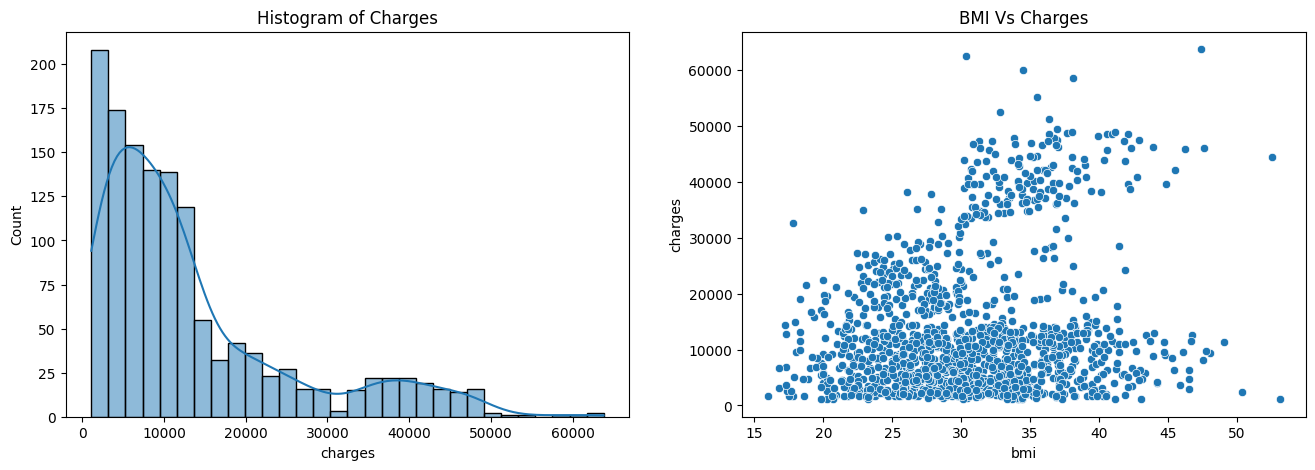

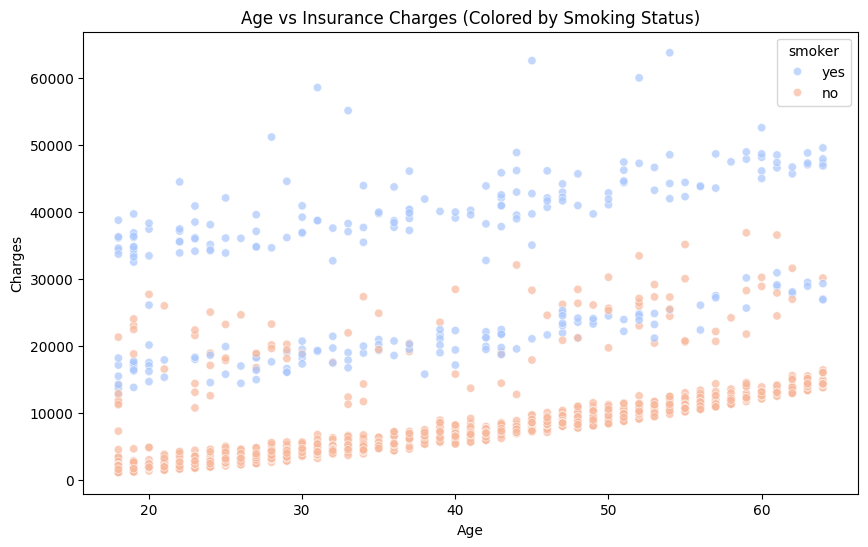

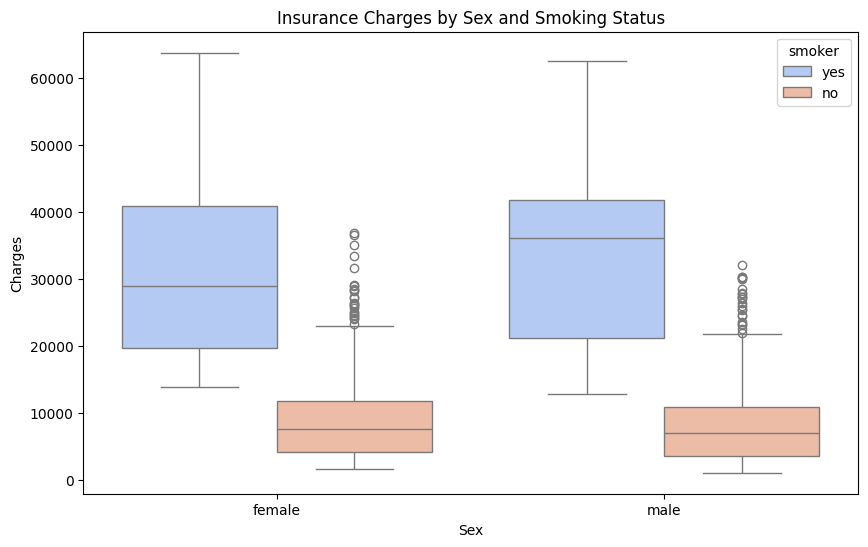

In [11]:
# Create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(insurance_data['charges'], kde = True, bins = 30)
plt.title('Histogram of Charges')

plt.subplot(1,2,2)
sns.scatterplot(x = 'bmi', y = 'charges', data= insurance_data)
plt.title('BMI Vs Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title("Age vs Insurance Charges (Colored by Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='sex', y='charges', hue='smoker', palette='coolwarm')
plt.title("Insurance Charges by Sex and Smoking Status")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()


## Statement
1. **Histogram of Charges**

Observation: The distribution of insurance charges is heavily right-skewed. Most individuals are paying lower insurance charges, with a significant drop in the count as charges increase.
Insight: The skewed distribution suggests that higher charges are less common, likely concentrated among certain groups (e.g., smokers, older individuals, or those with higher BMIs).

2. **BMI vs. Charges Scatter Plot**

Observation: There appears to be a positive trend between BMI and charges, indicating that individuals with higher BMIs tend to have higher insurance charges.
Insight: While there is an upward trend, the relationship isn’t strictly linear, as there’s a lot of variation in charges across similar BMI values. This could imply that other factors, like smoking status and age, play a role in determining charges even at the same BMI levels.

3. **Age vs. Charges Scatter Plot (Colored by Smoking Status)**

Observation: Smokers (blue points) tend to have much higher insurance charges than non-smokers (orange points) at all age levels. Additionally, charges generally increase with age for both smokers and non-smokers, although smokers consistently incur higher charges.
Insight: Age and smoking are both influential factors for charges, with smokers facing a substantial surcharge. This suggests that the model should incorporate both variables as key predictors, as they strongly impact insurance costs.

4. **Insurance Charges by Sex and Smoking Status Box Plot**

Observation: Smokers (blue boxes) have significantly higher charges than non-smokers (orange boxes) across both sexes. While there is some variation between males and females, the difference in charges between smokers and non-smokers is much more prominent.
Insight: Smoking is a primary driver of insurance charges, and while sex does cause some variability, it is not as significant. This box plot reinforces the observation that smokers bear much higher insurance costs, irrespective of gender.

**Summary**
The analysis of these plots reveals that:

***Smoking*** and ***age*** are major factors contributing to higher insurance charges.
Higher ***BMI*** is associated with increased charges, although other factors introduce variability.
***Sex*** has a minor influence on charges compared to smoking status and age.

In conclusion, a predictive model should focus on ***age, smoker, and BMI*** as primary variables for estimating insurance charges.

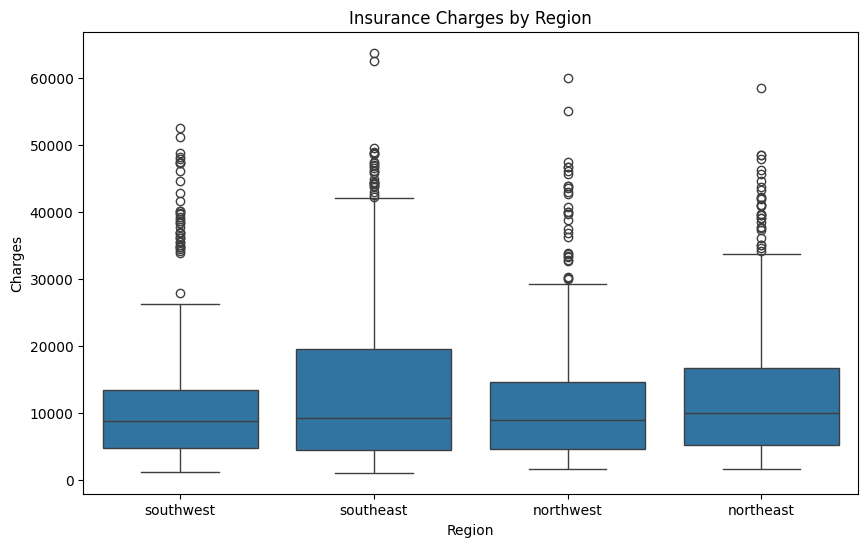

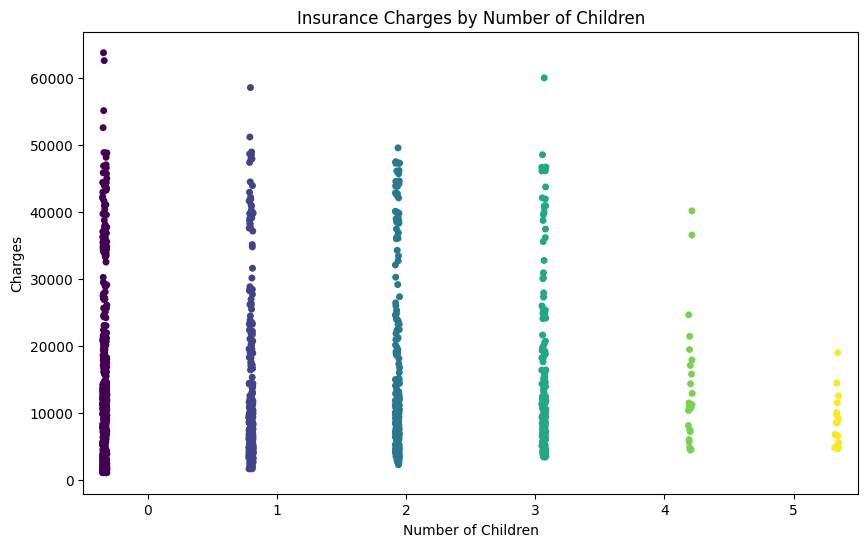

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='region', y='charges')
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(data=insurance_data, x='children', y='charges', hue='children', palette="viridis", dodge=True, legend=False)
plt.title("Insurance Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.show()


There may be slight regional effects on charges, with the Southeast showing slightly higher variability, but overall, region does not appear to be a major driver of insurance costs. This factor shows minimal impact on charges, as there is no consistent trend across categories. This suggests that the number of children is not a significant predictor of insurance premiums. These insights indicate that region and number of children may have minimal influence on insurance charges compared to other variables like age, BMI, and smoking status.